<img src="images/intro.jpeg">

# Project - Tree

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">1. Imports</h1></center>
</div>

In [115]:
import pandas as pd
from pandas import ExcelWriter
from pandas import ExcelFile
from datetime import datetime
import seaborn as sn
from matplotlib import pyplot as plt

<div style="background-color: #2f648a; border-radius: 5px;"> 
    <center><h1 style="color: white; padding: 20px;">2. Read files </h1></center>
</div>

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">2.1 Leitura da bases de dados dos formandos</h3></center>
</div>

In [116]:
form = pd.read_csv("databases/formandos_limpo.csv")

C:\Users\sarro\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [117]:
# delete column produced by the csv
del form['Unnamed: 0']

In [118]:
form.shape

(69378, 12)

In [119]:
form.head()

,UTE_ID,CodCEFP,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao
0,24054,201,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000
1,39165,309,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000
2,77485,402,0,51,12,PT,211.0,481,5,4817,0,434 days 00:00:00.000000000
3,145884,501,0,53,12,PT,465.0,812,5,8126,0,382 days 00:00:00.000000000
4,155241,501,1,51,12,PT,447.0,812,5,8126,1,382 days 00:00:00.000000000


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">2.2 Leitura da bases de dados dos cursos</h3></center>
</div>

In [120]:
cursos = pd.read_csv("databases/cursos.csv")

In [121]:
# delete column produced by the csv
del cursos['Unnamed: 0']

In [122]:
cursos.shape

(162138, 7)

In [123]:
cursos.head()

,UTE_ID,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,CATEGORIA,DCATEGORIA
0,5963829,FM089AC,COMUNICAÇÃO ASSERTIVA E TÉCNICAS DE PROCURA DE...,25.0,A,5,OCUPADO
1,4320275,811141A,TÉCNICO/A DE RESTAURANTE/BAR,3525.0,A,5,OCUPADO
2,5124212,81114ZZ,TÉCNICO/A DE RESTAURANTE/BAR (UFCD),1050.0,A,5,OCUPADO
3,4787421,81205ZZ,TURISMO AMBIENTAL E RURAL,1425.0,A,5,OCUPADO
4,5522037,FM089AC,COMUNICAÇÃO ASSERTIVA E TÉCNICAS DE PROCURA DE...,25.0,A,5,OCUPADO


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">2.3 Leitura da bases de dados dos centros de emprego</h3></center>
</div>

In [133]:
# ler ficheiro com informação dos centros de emprego por zona
centros = pd.read_excel("databases/AgrupamentoCentrosRegiao.xlsx")
centros.head(5)

,CodCEFP,Zona
0,302,Lisboa e Vale do Tejo
1,148,Norte
2,150,Norte
3,136,Norte
4,303,Lisboa e Vale do Tejo


In [134]:
centros.shape

(54, 2)

<div style="background-color: #2f648a; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">3. Junção das bases de dados</h1></center>
</div>

In [135]:
merged = form.merge(cursos, on="UTE_ID", how="inner")

In [136]:
merged.shape

(109595, 18)

In [137]:
merged.head(3)

,UTE_ID,CodCEFP,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,CATEGORIA,DCATEGORIA
0,24054,201,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000,62110ZZ,OPERADOR/A AGRÍCOLA (UFCD),825.0,A,5,OCUPADO
1,24054,201,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000,521641E,TÉCNICO/A ESPECIALISTA EM TECNOLOGIA MECATRÓNICA,1560.0,A,5,OCUPADO
2,39165,309,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000,48102ZZ,TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1025.0,A,5,OCUPADO


In [138]:
merged = merged.merge(centros, on="CodCEFP", how="left")
merged.head(5)

,UTE_ID,CodCEFP,Sexo,IdadeEmAnos,CodHabilitacao,CodNacionalidade,HorasForm,AreaFormacao,NivelFormacaoAccao,CodSaidaProfissional,Sucessos,DuracaoFormacao,F_CCURSO,F_DCURSO,F_HORAS,TIPO_UTENTE,CATEGORIA,DCATEGORIA,Zona
0,24054,201,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000,62110ZZ,OPERADOR/A AGRÍCOLA (UFCD),825.0,A,5,OCUPADO,Centro
1,24054,201,1,41,12,PT,1504.0,521,5,52174,0,375 days 00:00:00.000000000,521641E,TÉCNICO/A ESPECIALISTA EM TECNOLOGIA MECATRÓNICA,1560.0,A,5,OCUPADO,Centro
2,39165,309,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000,48102ZZ,TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1025.0,A,5,OCUPADO,Lisboa e Vale do Tejo
3,39165,309,0,45,12,PT,1300.0,481,5,4816,0,325 days 00:00:00.000000000,481061E,GESTÃO DE REDES E SISTEMAS INFORMÁTICOS,1375.0,A,5,OCUPADO,Lisboa e Vale do Tejo
4,77485,402,0,51,12,PT,211.0,481,5,4817,0,434 days 00:00:00.000000000,48102ZZ,TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1025.0,A,5,OCUPADO,Alentejo


In [139]:
# NEEDED FOR THE DJANGO INTERFACE TO WORK
merged_interface = merged[["UTE_ID", "CodCEFP", "IdadeEmAnos", "CodHabilitacao", 
                           "AreaFormacao", "HorasForm", "F_DCURSO", "Sexo"]]

merged_interface.to_csv("databases/interface_django_tree.csv")

In [140]:
merged_interface.dtypes

UTE_ID              int64
CodCEFP             int64
IdadeEmAnos         int64
CodHabilitacao      int64
AreaFormacao        int64
HorasForm         float64
F_DCURSO           object
Sexo                int64
dtype: object

<div style="background-color: #2f648a; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">4. Taxa de sucesso por curso</h1></center>
</div>

In [141]:
# criar tabela com contagem de cada formação
count_form = merged[['F_DCURSO', "UTE_ID"]] \
            .groupby("F_DCURSO") \
            .count() \
            .rename(columns = {'UTE_ID': 'Count'})

count_form

,Count
F_DCURSO,
ARRANJOS FLORAIS E DECORAÇÃO,20
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2
...,...
WEB E MULTIMÉDIA,28
WINDOWS SERVER - REDE E SERVIÇOS,4
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1


In [142]:
# filtrar apenas os casos de sucesso
succ = merged[merged["Sucessos"]==1]


# criar tabela com contagem de cada formação com outcome <sucesso>
count_form_succ = succ[['F_DCURSO', "UTE_ID"]] \
            .groupby("F_DCURSO") \
            .count() \
            .rename(columns = {'UTE_ID': 'Count_succ'})

count_form_succ

,Count_succ
F_DCURSO,
ARRANJOS FLORAIS E DECORAÇÃO,2
INTRODUÇÃO AOS CUIDADOS DE BELEZA,5
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,1
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,9
TÉCNICO/A DE BANCA E SEGUROS,2
...,...
VIDREIRO/A,43
WEB E MULTIMÉDIA,2
WINDOWS SERVER - REDE E SERVIÇOS,1


In [143]:
# merge both dataframe based on F_CCURSO
merge_count = count_form.merge(count_form_succ, on="F_DCURSO", how="left")

# change NAN to zeros
merge_count["Count_succ"] = merge_count["Count_succ"].fillna(0)
merge_count

,Count,Count_succ
F_DCURSO,,
ARRANJOS FLORAIS E DECORAÇÃO,20,2.0
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21,5.0
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11,1.0
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59,9.0
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2,0.0
...,...,...
WEB E MULTIMÉDIA,28,2.0
WINDOWS SERVER - REDE E SERVIÇOS,4,1.0
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1,1.0


In [144]:
# criar uma variável para guardar a taxa de sucesso de cada curso após a sua conclusão
merge_count["succ_rate"] = merge_count["Count_succ"] / merge_count["Count"]
merge_count

,Count,Count_succ,succ_rate
F_DCURSO,,,
ARRANJOS FLORAIS E DECORAÇÃO,20,2.0,0.100000
INTRODUÇÃO AOS CUIDADOS DE BELEZA,21,5.0,0.238095
LOGÍSTICA - CADEIA DE ABASTECIMENTO (B3) Q+,11,1.0,0.090909
LÍNGUA ESPANHOLA - ATENDIMENTO E VENDAS,59,9.0,0.152542
LÍNGUA ESPANHOLA - INFORMAÇÃO E ATENDIMENTO TÉCNICO,2,0.0,0.000000
...,...,...,...
WEB E MULTIMÉDIA,28,2.0,0.071429
WINDOWS SERVER - REDE E SERVIÇOS,4,1.0,0.250000
WORLDSKILLS KAZAN 2019 - FORMAÇÃO ESPECÍFICA EM SOLDADURA,1,1.0,1.000000


In [145]:
merge_count.to_csv("databases/succ_rate.csv")

<div style="background-color: #2f648a; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">5. Recommender System (Tree)</h1></center>
</div>

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.1 Input</h3></center>
</div>

In [146]:
# input utilizador

# descrição do utente
idade = 30
hab = 12
sexo = 0

# descrição do curso pretendido
horas = 500
centro = 309
area = 481

In [147]:
merged.shape

(109595, 19)

In [148]:
semelhantes = merged

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.2 Filtro da variável Sexo</h3></center>
</div>

In [151]:
# aplicar filtros relativos ao sexo do utente
semelhantes = merged[merged["Sexo"]==sexo]

In [152]:
semelhantes.shape

(37149, 19)

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.3 Filtro da variável Idade</h3></center>
</div>

In [153]:
# criação de duas variáveis relativas à idade minima e máxima na qual vamos basear o filtro 
scale = semelhantes["IdadeEmAnos"].max() - semelhantes["IdadeEmAnos"].min()

proportion = 0.15

min_age = idade - scale * 0.15
max_age = idade + scale * 0.15

# aplicar filtros relativos à idade do utente
semelhantes = semelhantes[(semelhantes["IdadeEmAnos"] > min_age) & (semelhantes["IdadeEmAnos"] < max_age)]

In [154]:
semelhantes.shape

(11993, 19)

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.4 Filtro da variável Horas da Formação</h3></center>
</div>

In [155]:
# criação de duas variáveis relativas ao tempo minimo e máximo em horas da formação.
scale = semelhantes["HorasForm"].max() - semelhantes["HorasForm"].min()

proportion = 0.10

min_hours = idade - scale * 0.15
max_hours = idade + scale * 0.15

# aplicar filtros relativos à idade do utente
semelhantes = semelhantes[(semelhantes["HorasForm"] > min_hours) & (semelhantes["HorasForm"] < max_hours)]

In [156]:
semelhantes.shape

(9185, 19)

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.5 Filtro da variável Centro de Formação (Zona)</h3></center>
</div>

In [157]:
# receber Centro e devolver Zona do País
zona = centros[centros["CodCEFP"] == centro]["Zona"]
zona_index = zona.index[0]
zona = zona[zona_index]
zona

'Lisboa e Vale do Tejo'

In [160]:
# aplicar filtros relativos ao centro de emprego do utente
semelhantes = semelhantes[semelhantes["Zona"]==zona]

In [161]:
semelhantes.shape

(2630, 19)

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">5.6 Filtro da variável Area de Formação</h3></center>
</div>

In [162]:
# aplicar filtros relativos à AreaFormacao do utente
semelhantes = semelhantes[semelhantes["AreaFormacao"]==area]

In [163]:
semelhantes.shape

(293, 19)

<div style="background-color: #2f648a; border-radius: 5px;">
    <center><h1 style="color: white; padding: 20px;">6. Output</h1></center>
</div>

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">6.1 Frequência absoluta</h3></center>
</div>

In [164]:
abs_freq = pd.DataFrame(semelhantes["F_DCURSO"].value_counts())
abs_freq.head(10)

,F_DCURSO
OPERADOR/A DE INFORMÁTICA,71
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,39
TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES,14
INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO,13
INSTALAÇÃO E GESTÃO DE REDES INFORMÁTICAS,13
GESTÃO DE REDES E SISTEMAS INFORMÁTICOS,12
ASSISTENTE ADMINISTRATIVO/A,9
PROGRAMADOR/A DE INFORMÁTICA,9
INSTALAÇÃO E MANUTENÇÃO DE SISTEMAS INFORMÁTICOS,8
CCNA1 & LINUX ESSENTIALS,8


In [165]:
# guardar indíce dos cursos do output
index = abs_freq.index
indexes = []

for i in index:
    indexes.append(i)

indexes[0:10]

['OPERADOR/A DE INFORMÁTICA',
 'TÉCNICO/A DE INFORMÁTICA - SISTEMAS',
 'TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES',
 'INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO',
 'INSTALAÇÃO E GESTÃO DE REDES INFORMÁTICAS',
 'GESTÃO DE REDES E SISTEMAS INFORMÁTICOS',
 'ASSISTENTE ADMINISTRATIVO/A',
 'PROGRAMADOR/A DE INFORMÁTICA',
 'INSTALAÇÃO E MANUTENÇÃO DE SISTEMAS INFORMÁTICOS',
 'CCNA1 & LINUX ESSENTIALS']

<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">6.2 Adicionar taxa de sucesso</h3></center>
</div>

In [172]:
succ_rate = merge_count.loc[indexes]
succ_rate.head(5)

,Count,Count_succ,succ_rate
F_DCURSO,,,
OPERADOR/A DE INFORMÁTICA,3545,1024.0,0.288858
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,1338,298.0,0.222720
TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES,170,51.0,0.300000
INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO,61,20.0,0.327869
INSTALAÇÃO E GESTÃO DE REDES INFORMÁTICAS,73,45.0,0.616438


In [167]:
output = pd.concat([abs_freq, succ_rate], axis=1)
output.head(5)

,F_DCURSO,Count,Count_succ,succ_rate
F_DCURSO,,,,
OPERADOR/A DE INFORMÁTICA,71,3545,1024.0,0.288858
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,39,1338,298.0,0.222720
TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES,14,170,51.0,0.300000
INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO,13,61,20.0,0.327869
INSTALAÇÃO E GESTÃO DE REDES INFORMÁTICAS,13,73,45.0,0.616438


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">6.3 Final score</h3></center>
</div>

In [173]:
# adicionar 0.05 à taxa de sucesso, deste modo, se esta for 0 o curso tem alguma probabilidade de recomendação
output["final_score"] = output["F_DCURSO"] * (output["succ_rate"] + 0.005)

# ordenar tabela pelo score final
output = output.sort_values("final_score", ascending=False)
output.head(5)

,F_DCURSO,Count,Count_succ,succ_rate,final_score
F_DCURSO,,,,,
OPERADOR/A DE INFORMÁTICA,71,3545,1024.0,0.288858,20.863886
TÉCNICO/A DE INFORMÁTICA - SISTEMAS,39,1338,298.0,0.222720,8.881099
INSTALAÇÃO E GESTÃO DE REDES INFORMÁTICAS,13,73,45.0,0.616438,8.078699
INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO,13,61,20.0,0.327869,4.327295
TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES,14,170,51.0,0.300000,4.270000


<div style="border: solid 4px #2f648a; border-radius: 5px;"> 
    <center><h3 style="color: #2f648a; padding: 10px;">6.4 Graph</h3></center>
</div>

In [169]:
final_scores = output["final_score"][0:10]
final_scores

F_DCURSO
OPERADOR/A DE INFORMÁTICA                                  20.863886
TÉCNICO/A DE INFORMÁTICA - SISTEMAS                         8.881099
INSTALAÇÃO E GESTÃO DE REDES INFORMÁTICAS                   8.078699
INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO       4.327295
TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES     4.270000
GESTÃO DE REDES E SISTEMAS INFORMÁTICOS                     4.214964
ASSISTENTE ADMINISTRATIVO/A                                 3.468699
INSTALAÇÃO E MANUTENÇÃO DE SISTEMAS INFORMÁTICOS            3.415000
CCNA1 & LINUX ESSENTIALS                                    2.987368
PROGRAMADOR/A DE INFORMÁTICA                                2.370228
Name: final_score, dtype: float64

In [170]:
final_indexes = output.index[0:10]
final_indexes

Index(['OPERADOR/A DE INFORMÁTICA', 'TÉCNICO/A DE INFORMÁTICA - SISTEMAS',
       'INSTALAÇÃO E GESTÃO DE REDES INFORMÁTICAS',
       'INFORMÁTICA - PROCESSADOR DE TEXTO E FOLHA DE CÁLCULO',
       'TÉCNICO/A DE INFORMÁTICA - INSTALAÇÃO E GESTÃO DE REDES',
       'GESTÃO DE REDES E SISTEMAS INFORMÁTICOS',
       'ASSISTENTE ADMINISTRATIVO/A',
       'INSTALAÇÃO E MANUTENÇÃO DE SISTEMAS INFORMÁTICOS',
       'CCNA1 & LINUX ESSENTIALS', 'PROGRAMADOR/A DE INFORMÁTICA'],
      dtype='object', name='F_DCURSO')

Text(0.5, 1.0, 'Top 10 - Formações recomendadas')

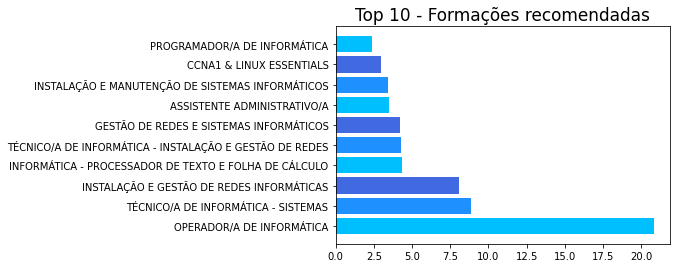

In [171]:
# Gráfico relativo ao sucesso e insucesso

plt.barh(final_indexes, final_scores, color=["#00BFFF", "#1E90FF", "#4169E1"])
plt.title("Top 10 - Formações recomendadas", size=17)